## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [2]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


/var/folders/1f/pj80vz8n2szdkjlb6bm9k7500000gn/T/ipykernel_53808/221622668.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
/var/folders/1f/pj80vz8n2szdkjlb6bm9k7500000gn/T/ipykernel_53808/221622668.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


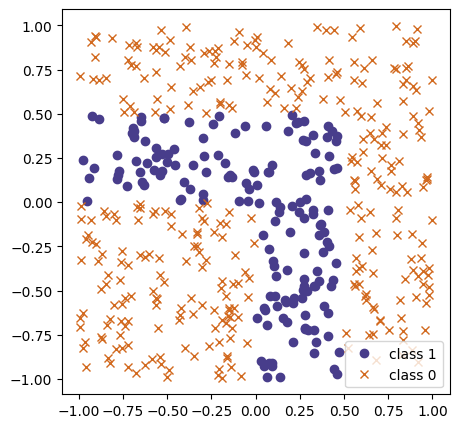

In [72]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [73]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    #print(np.shape(W_2))
    a_2 = sigmoid(z_2)
    #print(np.shape(a_2))
    z_3 = np.dot(a_2,W_2)
    #print(np.shape(z_3))
    #print(z_3)
    #print(len(x_mat))
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    #print(np.shape(y_pred))
    #print(y)
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    #print(np.shape(J_z_3_grad))
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    #print(np.shape(J_W_2_grad))
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    #print(np.shape(a_2_z_2_grad))
    #print(np.shape(np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [74]:
#### Initialize the network parameters
np.random.seed(1245)
#my code
W_1 = np.random.rand(3,4) *2 -1
W_2 = np.random.rand(4,1) *2 -1
#print(W_1,W_2)
#//
num_iter = 100000
learning_rate = 0.001
x_mat = x_mat_full

0.6320017995266078
0.0
0.6268247756786841
0.0
0.6228711952756869
0.0
0.6121033841800346
0.0
0.591856798651793
0.0
0.560158866143541
0.0
0.5192857267401322
0.0
0.4844022423401801
0.0
0.4463898559425968
0.0
0.40338358807581004
0.0
0.36353468511274956
0.0
0.3317436689391004
0.0
0.3053345639974666
0.0
0.28179978633084934
0.0
0.2596754637543619
0.0
0.23802476798741432
0.0
0.21657846673815678
0.0
0.1959841545398491
0.324
0.17732740454197016
0.324
0.16133877931632873
0.324
0.14810748350882402
0.324
0.1372984409404438
0.324
0.12844727899487693
0.324
0.12112497731687791
0.324
0.11498741997235676
0.324
0.10977242829176061
0.324
0.10528271716402128
0.324
0.10136928524139491
0.324
0.09791854945525125
0.324
0.09484299436934013
0.324
0.09207446407021755
0.324
0.08955933871248159
0.324
0.08725504496761508
0.324
0.08512751311272575
0.324
0.08314930850303477
0.324
0.08129824514221072
0.324
0.07955634478137609
0.324
0.07790904378693342
0.324
0.07634457712893891
0.324
0.07485348807954853
0.324
0.07342822

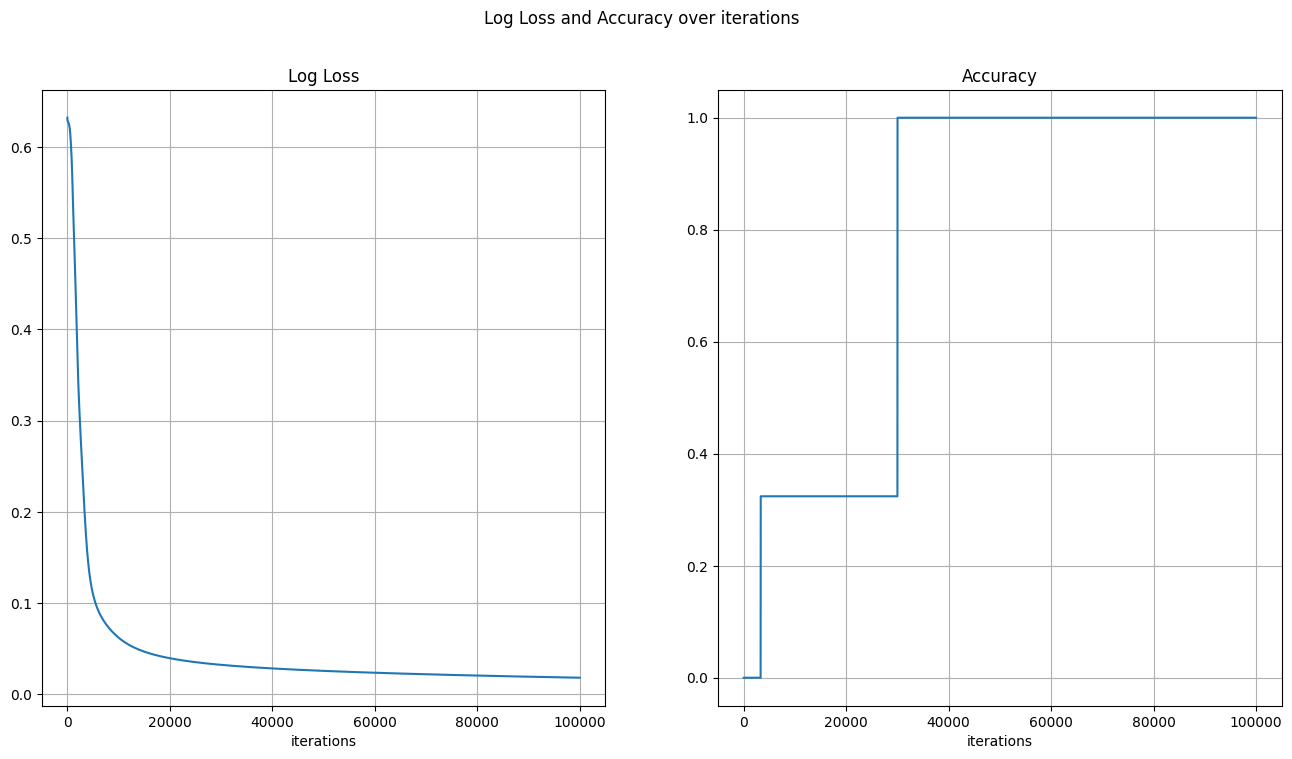

In [75]:

loss_vals, accuracies = [], []
checked = 0
reached = 0
for i in range(num_iter):
    #my code in here
    ### Do a forward computation, and get the gradient
    y_pred, grad = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_2 = W_2 - (grad[1].reshape(-1,1) * learning_rate)
    W_1 = W_1 - (grad[0] * learning_rate) 
    ### Compute the loss and accuracy
    loss = loss_fn(y,y_pred)
    loss_vals.append(loss)
    acc_count = 0
    for j in y:
        if y[j] == 0 and y_pred[j] <= 0.005:
            acc_count+=1
        elif y_pred[j] >= 0.995:
            acc_count += 1
    acc = acc_count/num_obs
    accuracies.append(acc)
    ## Print the loss and accuracy for every 200th iteration
    if i%200 == 0:
        print(loss)
        print(acc)
    if(checked == 0 and acc == 1):
        checked = 1
        reached = i
print(reached)
plot_loss_accuracy(loss_vals, accuracies)

In [76]:
#Circle reached 100 percent accuracy (within 0.005) after 56442 iterations with a loss of 0.027207310429183118 at 100000
#Diamond reached 100 percent accuracy after 3991 iterations with a loss of 0.05550725494158586 at 100000
#Centered square only got to an accuracy of 24.4% with a loss of 0.02598024754806574
#Thick Right Angle reached 100 percent accurarcy after 17602 iterations with a loss of 0.015468205245052592 at 100000
#Thin Right Angle reached 100 percent accurarcy after 29999 iterations with a loss of 0.01802529037945722 at 100000

#With this data diamond is by far the quickest, but has the highest loss by far of all of them with the right angles
# having the best loss, with the thick right angle probably having the best loss to accuracy time

In [ ]:
#### Plot the predicted answers with mistakes in yellow